# Arborele de decizie

Un <b>arbore de decizie</b> este o structură de arbore asemănătoare unui flux în care un <b>nod intern</b> reprezintă o caracteristică (sau un <b>atribut</b>), ramura reprezintă o <b>regulă de decizie</b> și fiecare <b>nod frunză reprezintă rezultatul.</b>

 Cel mai înalt nod dintr-un arbore de decizie este cunoscut sub numele de <b>nod rădăcină.</b> Învață pe baza valorii atributului.  

Această structură ajută în luarea deciziilor.

Vizualizarea este o diagramă care imită cu ușurință gândirea umană. <b>Arborii de decizie</b> sunt ușor de înțeles și de interpretat.


<img src="files/tree.jpg">

# Construirea arborelui de decizie în Scikit-learn

### Importăm librăriile necesare

In [7]:
# Încărcarea librăriilor
import pandas as pd # Dataframe-ul și series-ul nostru
from sklearn.tree import DecisionTreeClassifier # Importăm Clasificatorul „Arborele decizional”
from sklearn.model_selection import train_test_split # Importăm funcția de separare a datelor în date de antrenare și date de testare
from sklearn import metrics #Importăm modulel metrici pentru caluclarea acurateții
%matplotlib inline

### Importăm setul de date


Eu voi lucra cu <b>balance-scale.csv</b> - clasic pentru această problemă.

In [19]:
balance = pd.read_csv("data/balance-scale.csv", header = None,
names = ['ClassName','LeftWeight','LeftDistance','RightWeight','RightDistance'])
balance

,ClassName,LeftWeight,LeftDistance,RightWeight,RightDistance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
...,...,...,...,...,...
620,L,5,5,5,1
621,L,5,5,5,2
622,L,5,5,5,3
623,L,5,5,5,4


In [20]:
from sklearn import preprocessing # preprocesarea datelor
from sklearn.preprocessing import OrdinalEncoder # functie care transforma din date categorice in numere
enc = preprocessing.OrdinalEncoder()

# caută legitate în date
enc.fit(balance)  

# transformă după legea găsită într-un array
data = enc.transform(balance)

balance = pd.DataFrame({'ClassName': data[:, 0], 'LeftWeight': data[:, 1], 'LeftDistance': data[:, 2], 
                       'RightWeight': data[:, 3], 'RightDistance': data[:, 4]})
balance

,ClassName,LeftWeight,LeftDistance,RightWeight,RightDistance
0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,1.0
2,2.0,0.0,0.0,0.0,2.0
3,2.0,0.0,0.0,0.0,3.0
4,2.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...
620,1.0,4.0,4.0,4.0,0.0
621,1.0,4.0,4.0,4.0,1.0
622,1.0,4.0,4.0,4.0,2.0
623,1.0,4.0,4.0,4.0,3.0


### Selectarea caracteristicilor

In [21]:
#despărțim datasetul în vector de caracteristici (features) și vectorul clasă
features = ['LeftWeight','LeftDistance','RightWeight','RightDistance']
X = balance[features] # caracteristicile (atributele pentru X)
y = balance.ClassName # Variabila clasă (independentă dacă facem analogie cu regresia)

### Împărțirea setului de date
Pentru a evalua performanța modelului o strategie ar fie împărțirea setului de date în: date de antrenare/învățare și date pentru testare/evaluare.

Putem face acest lucru utilizând funcția train_test_split(). Funcția ia 3 parametri: caracteristicile, clasa și lungimea setului de date pentru testare.

In [22]:
# Împărțim setul de date în train set și test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% pentru antrenare and 30% testare
X_test

,LeftWeight,LeftDistance,RightWeight,RightDistance
552,4.0,2.0,0.0,2.0
23,0.0,0.0,4.0,3.0
41,0.0,1.0,3.0,1.0
598,4.0,3.0,4.0,3.0
370,2.0,4.0,4.0,0.0
...,...,...,...,...
4,0.0,0.0,0.0,4.0
291,2.0,1.0,3.0,1.0
472,3.0,3.0,4.0,2.0
410,3.0,1.0,2.0,0.0


### Construirea modelului

In [23]:
# Crearea obiectului de clasificare pe bază de arbore de decizie cu parametru criterie
clasificator = DecisionTreeClassifier(criterion="entropy")

# Antrenarea clasificatorului cu datele noastre utilizând metoda fit() și ca parametru avem datele de antrenare
clasificator_arbore_decizie = clasificator.fit(X_train,y_train)

### Evaluarea modelului

In [24]:
#Prezice clasele pentru setul de testare utilizând metoda predict(parametru_setu_de_testare)
y_prezis = clasificator_arbore_decizie.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_prezis))
print(y_test, y_prezis)

Accuracy: 0.7819148936170213
552    1.0
23     2.0
41     2.0
598    0.0
370    1.0
      ... 
4      2.0
291    2.0
472    1.0
410    1.0
207    1.0
Name: ClassName, Length: 188, dtype: float64 [1. 2. 2. 2. 1. 1. 1. 2. 1. 2. 2. 1. 1. 1. 1. 2. 2. 2. 2. 2. 1. 2. 2. 1.
 1. 2. 1. 2. 0. 2. 2. 1. 2. 1. 2. 1. 2. 1. 2. 2. 1. 1. 1. 2. 2. 0. 2. 2.
 2. 2. 2. 2. 2. 1. 1. 2. 1. 0. 2. 2. 1. 2. 1. 1. 1. 2. 1. 2. 2. 1. 1. 2.
 1. 2. 0. 1. 2. 1. 1. 1. 1. 2. 2. 1. 2. 2. 1. 1. 0. 1. 1. 1. 1. 2. 0. 2.
 1. 1. 1. 1. 2. 1. 2. 2. 2. 1. 2. 2. 2. 1. 2. 2. 2. 1. 0. 2. 1. 2. 1. 2.
 1. 1. 1. 2. 2. 1. 1. 1. 2. 1. 2. 1. 1. 2. 2. 0. 1. 0. 2. 2. 1. 2. 0. 1.
 1. 2. 2. 1. 1. 2. 2. 2. 1. 2. 2. 2. 1. 1. 2. 2. 1. 0. 2. 1. 1. 1. 1. 1.
 2. 2. 1. 0. 2. 0. 1. 0. 2. 1. 1. 2. 1. 2. 2. 2. 0. 1. 1. 0.]


In [26]:
obiect_nou = X_test[X_test["LeftWeight"] == 2.0]
clasificator_arbore_decizie.predict(obiect_nou)

array([1., 2., 2., 1., 2., 1., 2., 2., 2., 1., 0., 2., 2., 0., 1., 1., 1.,
       1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 0., 0., 2.,
       1., 1., 0.])

### Vizualizarea arborelui

Puteți folosi funcția export_graphviz din Scikit-learn pentru a afișa arborele în Jupyter Notebook. Pentru a face diagram de asemenea este nevoie de biblioteca pudotplus.
Pentru instalarea clasică:

- pip install graphviz

- pip install pydotplus

funcția export_graphviz transformă clasificatorul nostru intr-un fișier cu puncte, iar pydotplus convertește aceste puncte într-un fișier png.

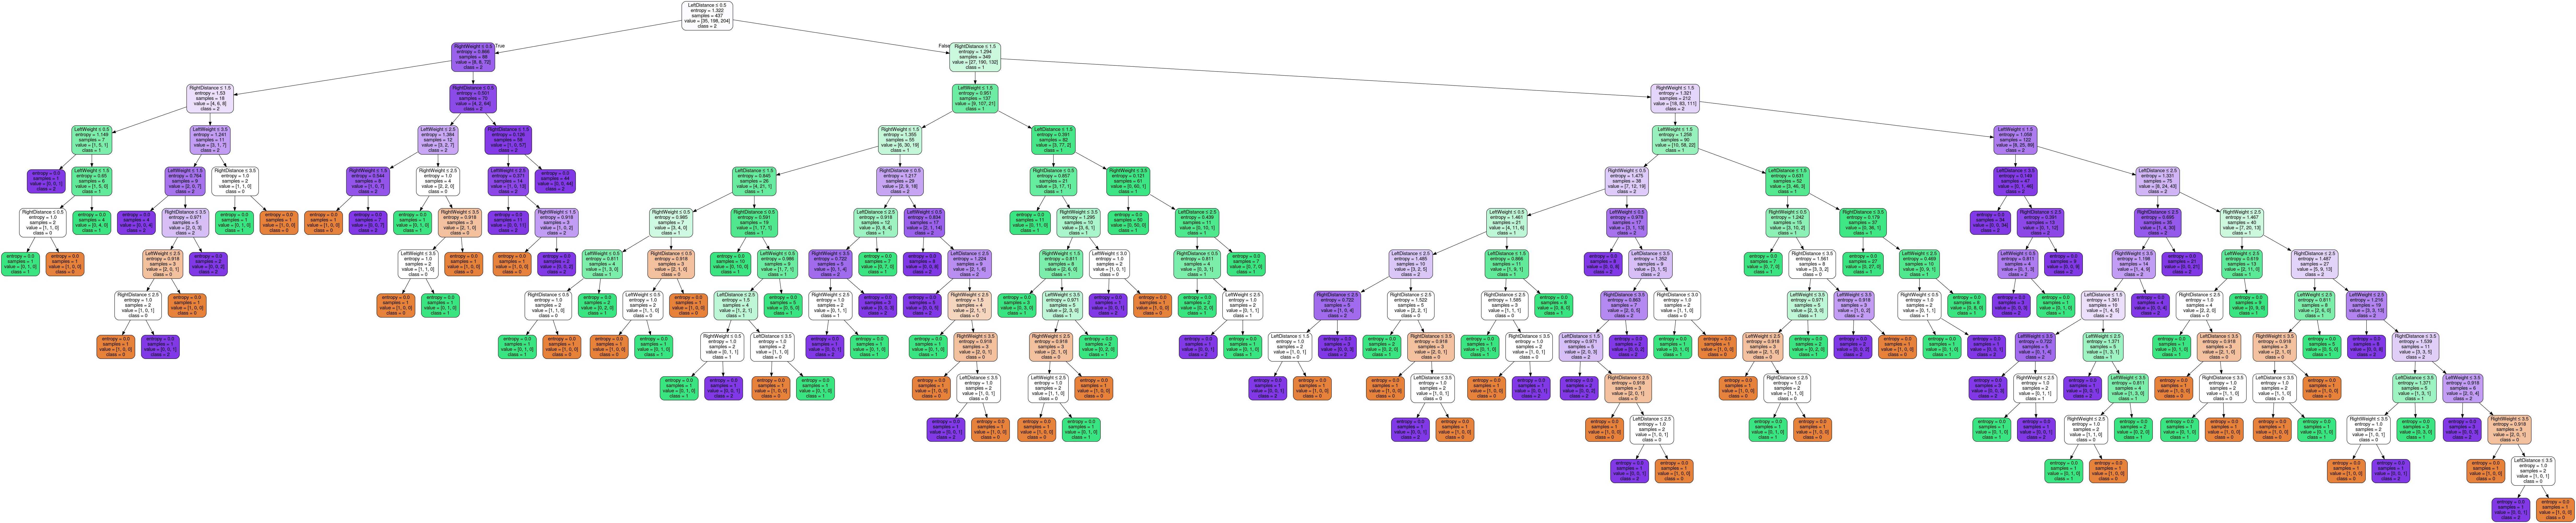

In [29]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clasificator_arbore_decizie, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = features,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('balance.png')
Image(graph.create_png())

Concluzie:
    La aceasta lucrare de laborator am studiat un algoritm de clasificare prin arbore de decizie. Un arbore de decizie este o structură de arbore asemănătoare unui flux în care un nod intern reprezintă o caracteristică (sau un atribut), ramura reprezintă o regulă de decizie și fiecare nod frunză reprezintă rezultatul.
    Am ales propriul nostru set de date si am construit in final arborele de decizie dupa ce l-am invatat cu datele initiale acesta este un algoritm destul de interesant insa poate fi utilizat doar la clasificare.